# PENJELASAN
## Impor Library yang Diperlukan dan Memuat Data¶

In [12]:
# Import pandas and load the day.csv data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data/day.csv")

## Inspeksi Awal Data

In [13]:
print(df.head())
print(df.info())
print(df.describe())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
<class 'pandas.core.frame.

## Mengatasi Nilai yang Hilang (Missing Values)
### Periksa apakah ada nilai yang hilang

In [14]:
print(df.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


### Jika ada nilai yang hilang, Anda bisa mengisi dengan nilai rata-rata, median, atau menghapus baris tersebut

In [15]:
df.fillna(df.mean(), inplace=True)  # Mengisi dengan nilai rata-rata
# atau
df.dropna(inplace=True)  # Menghapus baris yang memiliki nilai hilang

C:\Users\ianan\AppData\Local\Temp\ipykernel_24836\2071283108.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Mengisi dengan nilai rata-rata


## Menghapus Duplikat
### Periksa dan hapus baris duplikat

In [16]:
df.drop_duplicates(inplace=True)

## Menghapus Data Hari Libur

In [17]:
# Menghapus data hari libur
df_no_holiday = df[df['holiday'] == 0]

## Statistik Deskriptif Setelah Menghapus Hari Libur

In [18]:
# Statistik deskriptif setelah menghapus hari libur
descriptive_stats_no_holiday = df_no_holiday[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].describe()
print(descriptive_stats_no_holiday)

             temp       atemp         hum   windspeed       casual  \
count  710.000000  710.000000  710.000000  710.000000   710.000000   
mean     0.496283    0.475264    0.628284    0.190402   841.771831   
std      0.182532    0.162424    0.143218    0.077489   680.528529   
min      0.059130    0.079070    0.000000    0.022392     2.000000   
25%      0.341667    0.338368    0.519375    0.134494   314.250000   
50%      0.502500    0.489690    0.627083    0.180348   711.500000   
75%      0.654792    0.607972    0.730313    0.233218  1080.000000   
max      0.861667    0.840896    0.972500    0.507463  3410.000000   

        registered          cnt  
count   710.000000   710.000000  
mean   3685.332394  4527.104225  
std    1553.704431  1929.013947  
min      20.000000    22.000000  
25%    2546.000000  3214.000000  
50%    3691.000000  4558.000000  
75%    4805.500000  5932.750000  
max    6946.000000  8714.000000  


##  Visualisasi Statistik Deskriptif
### Menghitung statistik deskriptif untuk kolom numerik seperti temp, atemp, hum, windspeed, casual, registered, dan cnt

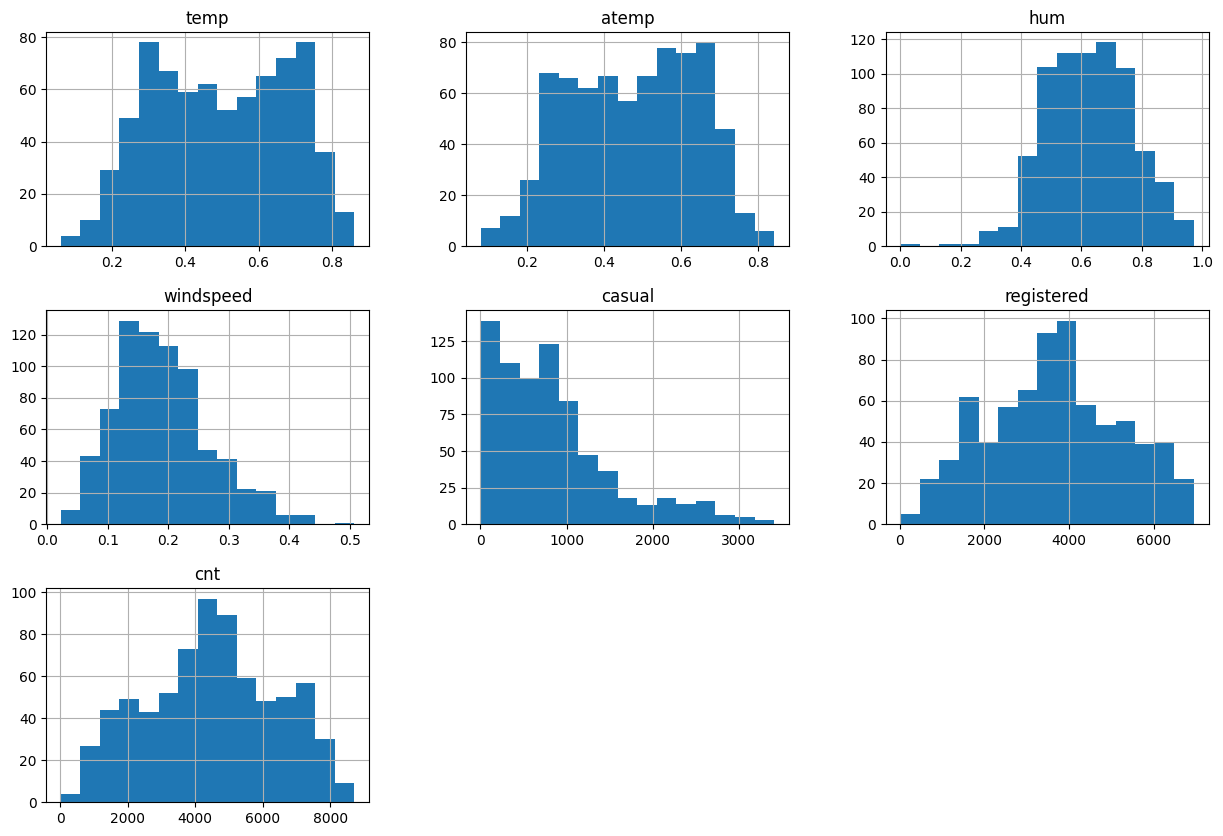

In [19]:
# Histogram untuk kolom numerik
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.show()

### Outliers

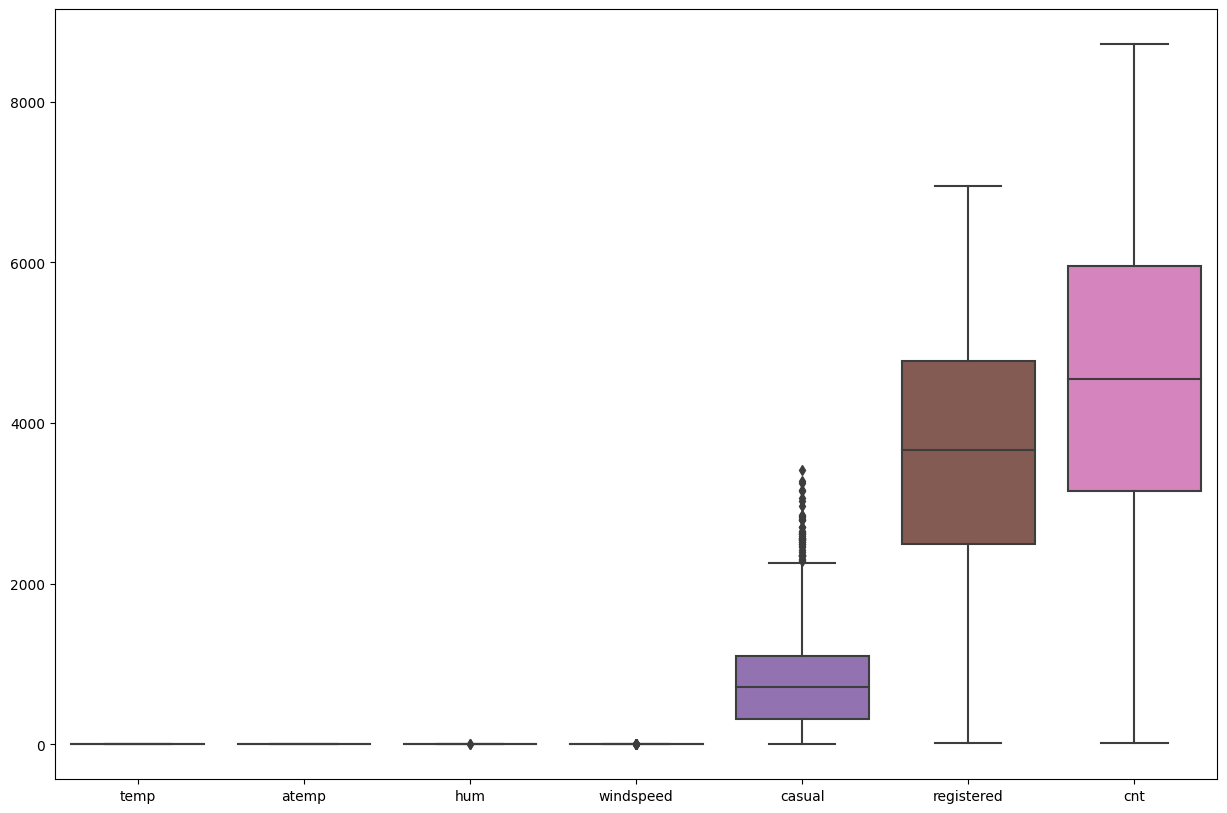

In [20]:
# Boxplot untuk kolom numerik
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numerical_columns])
plt.show()

In [24]:
# Menghapus outliers (contoh: menggunakan IQR)
Q1 = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].quantile(0.25)
Q3 = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']] < (Q1 - 1.5 * IQR)) |(df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']] > (Q3 + 1.5 * IQR))).any(axis=1)]

## Data Transformation

In [21]:
from sklearn.preprocessing import StandardScaler

# Normalisasi kolom numerik
scaler = StandardScaler()
df[['temp', 'atemp', 'hum', 'windspeed']] = scaler.fit_transform(df[['temp', 'atemp', 'hum', 'windspeed']])

## Feature Engineering

In [22]:
# Menambahkan kolom day_of_year
df['day_of_year'] = pd.to_datetime(df['dteday']).dt.dayofyear

# Menambahkan kolom is_weekend
df['is_weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

## Encoding Categorical Variables

In [23]:
# One-hot encoding untuk variabel kategorikal
df_encoded = pd.get_dummies(df, columns=['season', 'weathersit', 'weekday', 'mnth'])

## Analisis Korelasi

C:\Users\ianan\AppData\Local\Temp\ipykernel_24836\1933908205.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


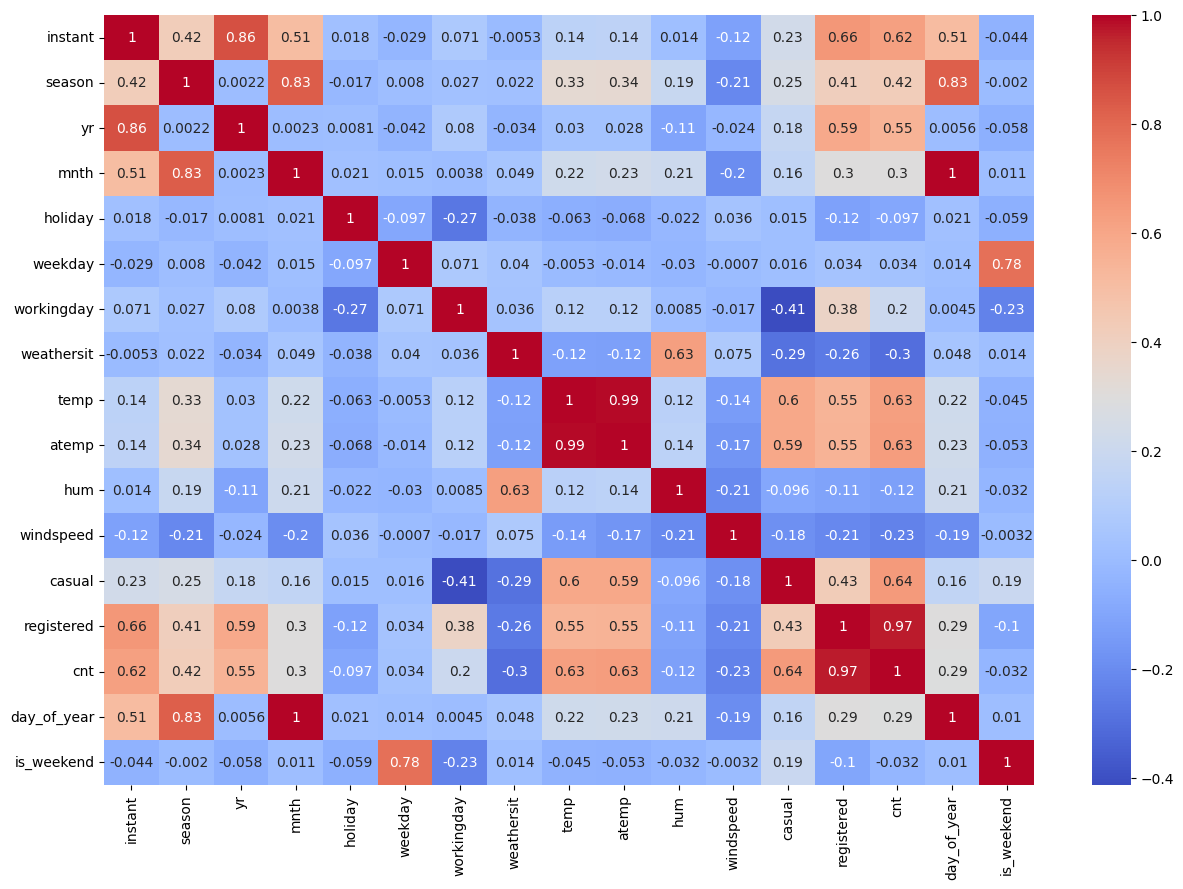

In [25]:
# Matriks korelasi
correlation_matrix = df.corr()

# Visualisasi matriks korelasi
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

## Tren Penyewaan Sepeda Berdasarkan Waktu

### Interpretasi Umum

* **Fluktuasi Tinggi:** Grafik menunjukkan fluktuasi yang sangat tinggi dalam jumlah penyewaan sepeda dari hari ke hari. Ini mengindikasikan bahwa banyak faktor yang mempengaruhi permintaan penyewaan sepeda.
* **Pola Musiman:** Secara umum, terlihat adanya pola musiman. Terdapat periode di mana jumlah penyewaan sepeda cenderung tinggi, dan periode di mana jumlah penyewaan sepeda cenderung rendah. Ini mungkin terkait dengan perubahan musim dan kondisi cuaca.
* **Puncak dan Lembah:** Terdapat beberapa puncak dan lembah yang sangat tajam dalam grafik. Puncak menunjukkan periode dengan permintaan yang sangat tinggi, sedangkan lembah menunjukkan periode dengan permintaan yang sangat rendah.

### Faktor-faktor yang Mungkin Mempengaruhi

* **Cuaca:** Cuaca yang baik (cerah, hangat) cenderung meningkatkan permintaan penyewaan sepeda, sedangkan cuaca buruk (hujan, dingin) cenderung mengurangi permintaan.
* **Hari dalam Seminggu:** Biasanya, akhir pekan (Sabtu dan Minggu) memiliki jumlah penyewaan sepeda yang lebih tinggi dibandingkan hari kerja.
* **Musim:** Seperti yang telah disebutkan sebelumnya, terdapat pola musiman dalam penyewaan sepeda. Musim panas biasanya menjadi puncak musim penyewaan.
* **Acara Khusus:** Acara-acara khusus seperti festival, konser, atau pertandingan olahraga dapat menyebabkan lonjakan permintaan penyewaan sepeda secara temporer.
* **Hari Libur:** Hari libur nasional atau regional juga dapat mempengaruhi jumlah penyewaan sepeda.

### Kesimpulan

Grafik ini memberikan gambaran yang menarik tentang dinamika penyewaan sepeda. Dengan analisis yang lebih mendalam, kita dapat mengidentifikasi faktor-faktor utama yang mempengaruhi permintaan penyewaan sepeda dan memanfaatkan informasi ini untuk berbagai keperluan, seperti perencanaan bisnis, perencanaan kota, dan pengembangan produk.

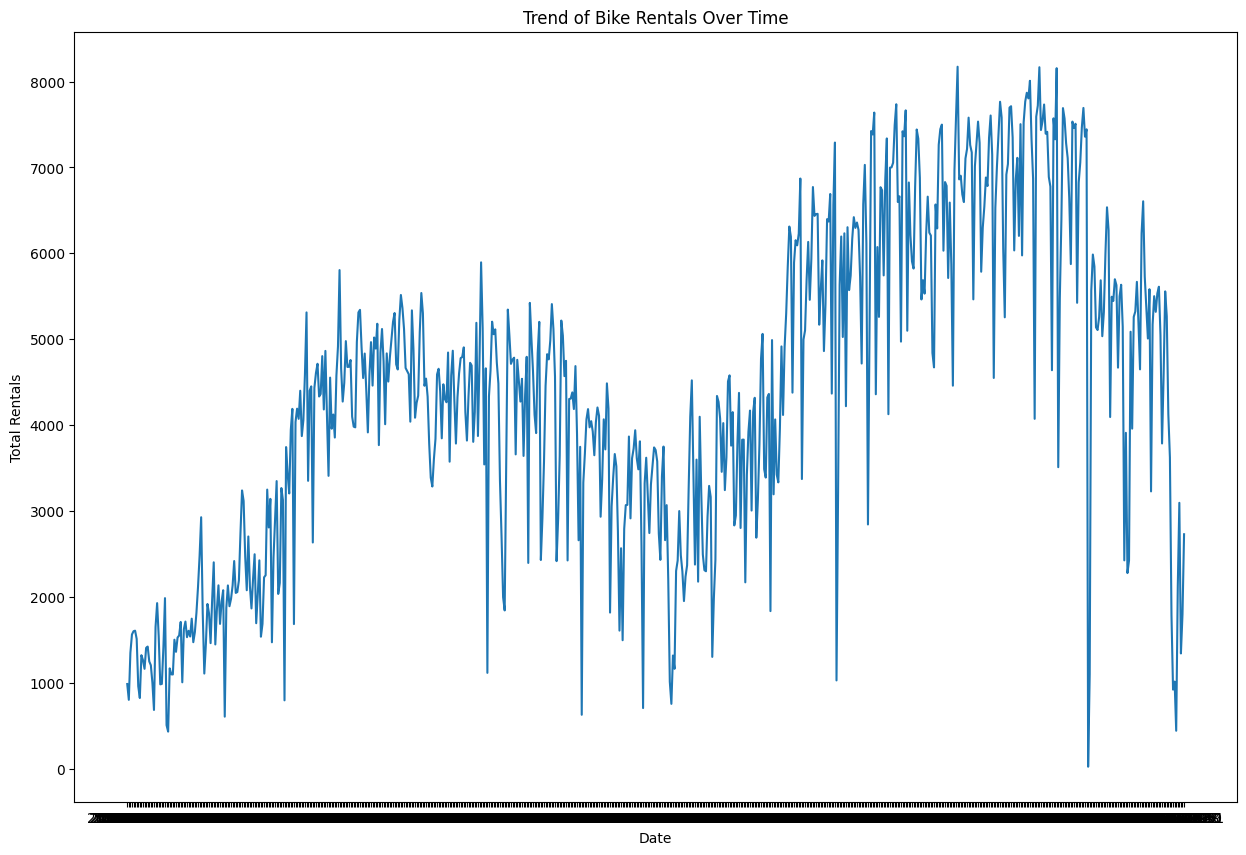

In [37]:
# Tren penggunaan sepeda berdasarkan waktu
plt.figure(figsize=(15, 10))
plt.plot(df['dteday'], df['cnt'])
plt.xlabel('Date')
plt.ylabel('Total Rentals')
plt.title('Trend of Bike Rentals Over Time')
plt.show()

## Distribusi Pengguna Sepeda Berdasarkan Musim, Penggunaan sepeda berdasarkan hari kerja, Penggunaan sepeda berdasarkan situasi cuaca

#### Penggunaan Sepeda Berdasarkan Musim
Boxplot ini menunjukkan bagaimana jumlah penyewaan sepeda bervariasi di setiap musim. Musim diwakili oleh angka:

1: Musim semi

2: Musim panas

3: Musim gugur

4: Musim dingin

Interpretasi:

Musim Panas (2): Biasanya menunjukkan jumlah penyewaan sepeda yang lebih tinggi karena cuaca yang lebih baik untuk bersepeda.
Musim Dingin (4): Biasanya menunjukkan jumlah penyewaan sepeda yang lebih rendah karena cuaca yang kurang mendukung untuk bersepeda.

#### Penggunaan Sepeda Berdasarkan Hari Kerja

Penjelasan:

0: Bukan hari kerja (akhir pekan atau hari libur)

1: Hari kerja

Interpretasi:

Hari Kerja (1): Biasanya menunjukkan jumlah penyewaan sepeda yang lebih tinggi karena banyak orang menggunakan sepeda untuk pergi bekerja.
Bukan Hari Kerja (0): Biasanya menunjukkan jumlah penyewaan sepeda yang lebih rendah, tetapi masih signifikan karena banyak orang bersepeda untuk rekreasi.

#### Penggunaan Sepeda Berdasarkan Situasi Cuaca

Boxplot ini menunjukkan bagaimana jumlah penyewaan sepeda bervariasi berdasarkan situasi cuaca. Situasi cuaca diwakili oleh angka:

1: Clear, Few clouds, Partly cloudy, Partly cloudy (Cerah, Sedikit berawan, Sebagian berawan)
Deskripsi: Cuaca cerah atau sedikit berawan, yang biasanya merupakan kondisi ideal untuk bersepeda.
Pengaruh: Biasanya, jumlah penyewaan sepeda cenderung lebih tinggi pada hari-hari dengan cuaca cerah.

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist (Berkabut + Berawan, Berkabut + Awan pecah, Berkabut + Sedikit berawan, Berkabut)
Deskripsi: Cuaca berkabut dengan berbagai tingkat awan, yang mungkin sedikit mengurangi kenyamanan bersepeda.
Pengaruh: Jumlah penyewaan sepeda mungkin sedikit lebih rendah dibandingkan dengan cuaca cerah, tetapi masih cukup tinggi.

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds (Salju ringan, Hujan ringan + Badai petir + Awan tersebar, Hujan ringan + Awan tersebar)
Deskripsi: Cuaca dengan salju ringan atau hujan ringan yang disertai badai petir dan awan tersebar, yang bisa membuat bersepeda kurang nyaman.
Pengaruh: Jumlah penyewaan sepeda cenderung lebih rendah pada kondisi cuaca ini karena kurang ideal untuk bersepeda.

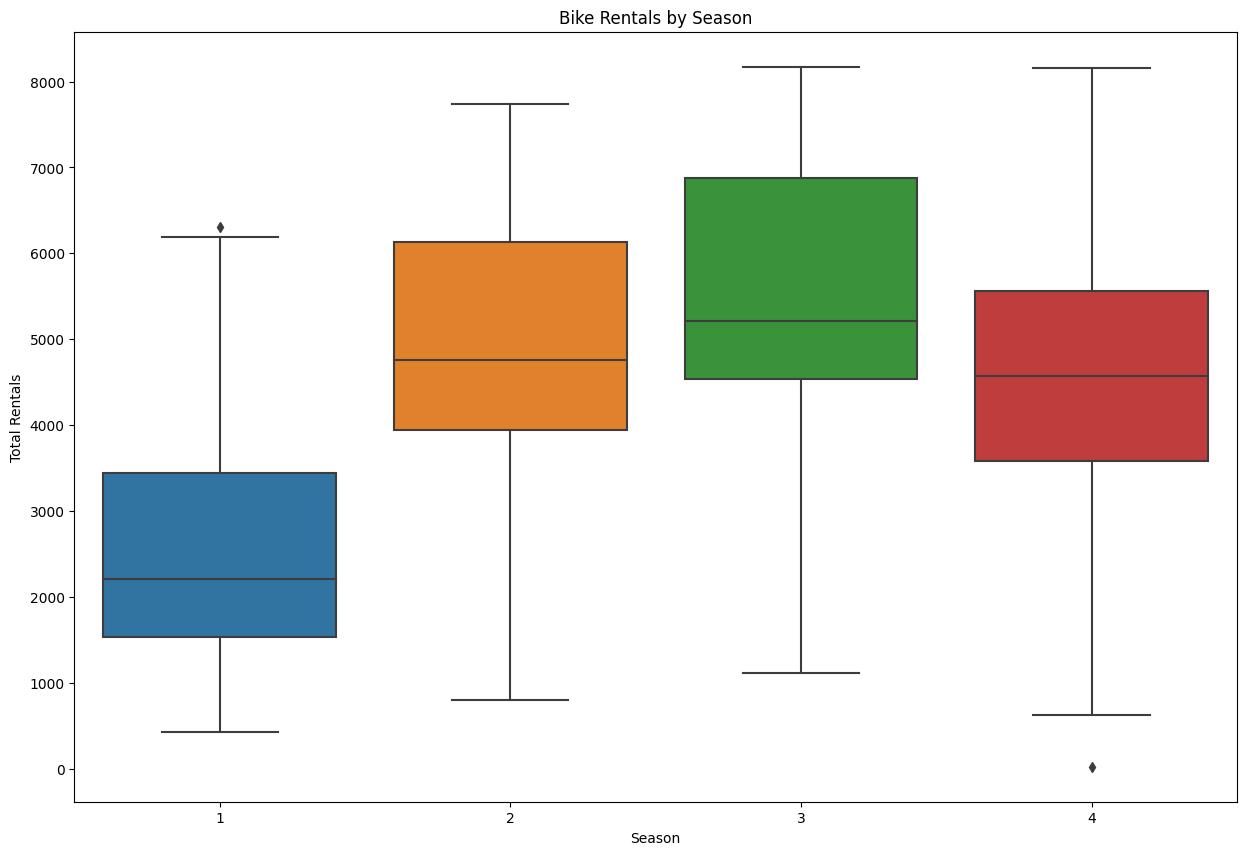

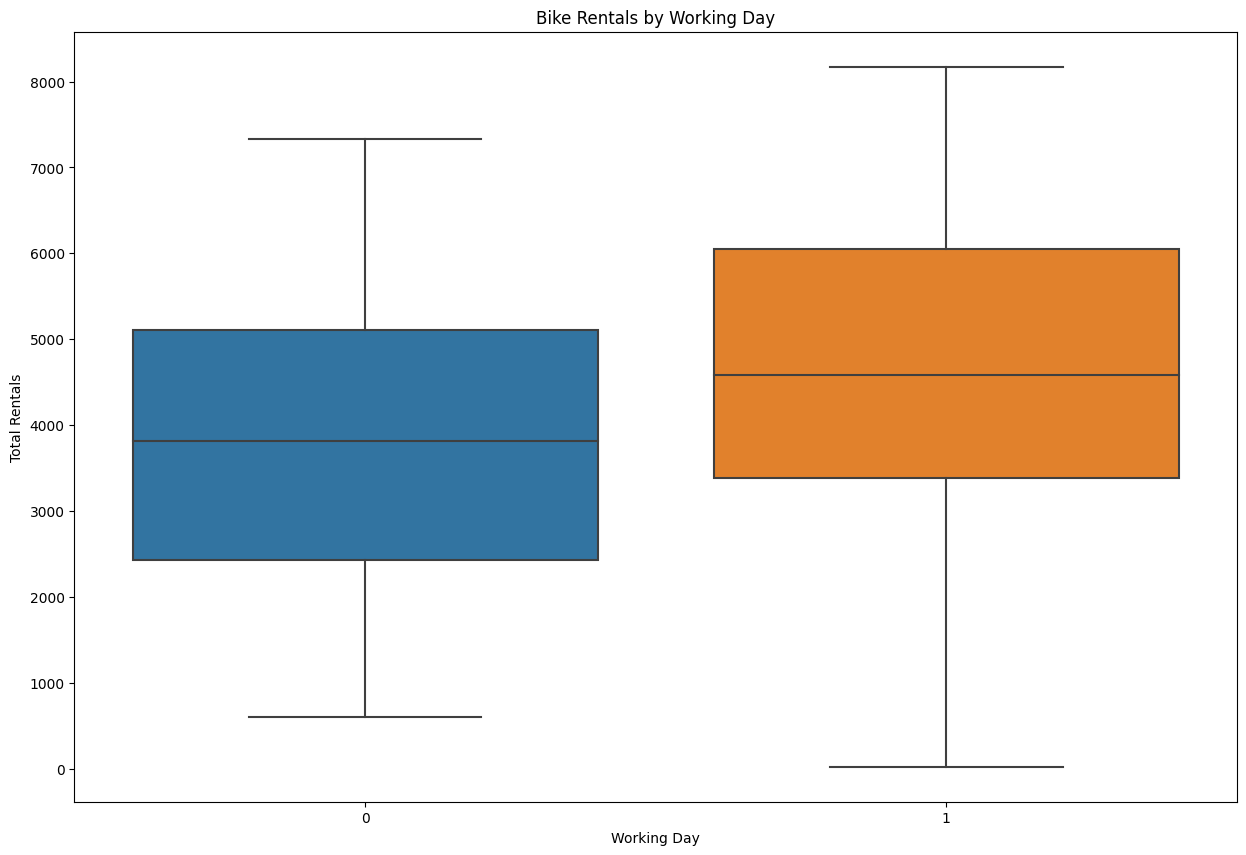

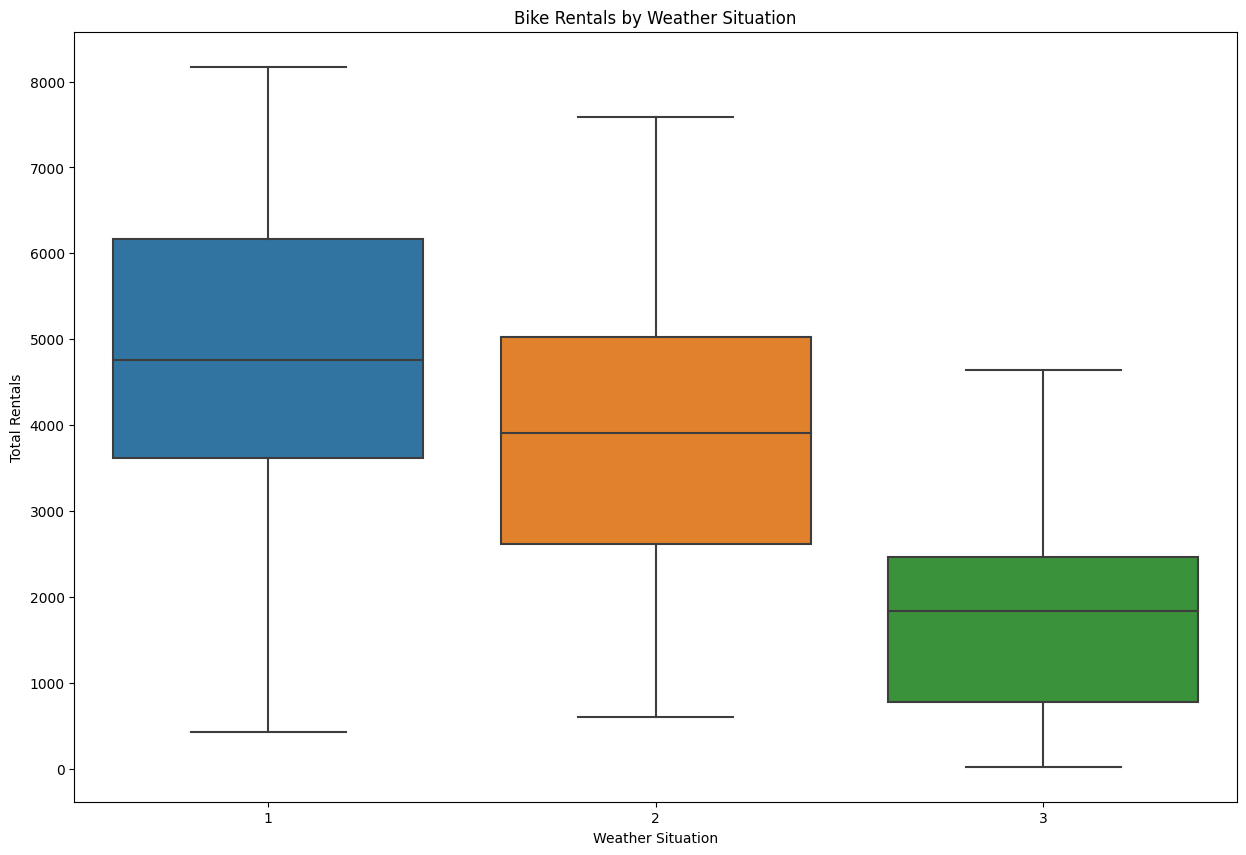

In [36]:
# Penggunaan sepeda berdasarkan musim
plt.figure(figsize=(15, 10))
sns.boxplot(x='season', y='cnt', data=df)
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by Season')
plt.show()

# Penggunaan sepeda berdasarkan hari kerja
plt.figure(figsize=(15, 10))
sns.boxplot(x='workingday', y='cnt', data=df)
plt.xlabel('Working Day')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by Working Day')
plt.show()

# Penggunaan sepeda berdasarkan situasi cuaca
plt.figure(figsize=(15, 10))
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.xlabel('Weather Situation')
plt.ylabel('Total Rentals')
plt.title('Bike Rentals by Weather Situation')
plt.show()

## Korelasi Antar Fitur

Interpretasi Matriks Korelasi :

- temp dan atemp: Biasanya memiliki korelasi yang sangat tinggi karena atemp adalah suhu yang dirasakan, yang sangat terkait dengan suhu sebenarnya (temp).
- casual dan registered: Kedua variabel ini mungkin memiliki korelasi yang tinggi dengan cnt karena cnt adalah jumlah total penyewaan sepeda, yang merupakan penjumlahan dari casual dan registered.
- hum dan windspeed: Korelasi antara kelembaban (hum) dan kecepatan angin (windspeed) mungkin rendah karena mereka adalah variabel lingkungan yang berbeda.

Interpretasi :

- temp dan cnt: Jika korelasi antara temp dan cnt tinggi, ini menunjukkan bahwa suhu yang lebih tinggi mungkin terkait dengan peningkatan jumlah penyewaan sepeda.
- hum dan cnt: Jika korelasi antara hum dan cnt negatif, ini menunjukkan bahwa kelembaban yang lebih tinggi mungkin terkait dengan penurunan jumlah penyewaan sepeda.
- casual dan registered: Korelasi tinggi antara casual dan registered dengan cnt menunjukkan bahwa kedua jenis pengguna (kasual dan terdaftar) berkontribusi signifikan terhadap total penyewaan sepeda.

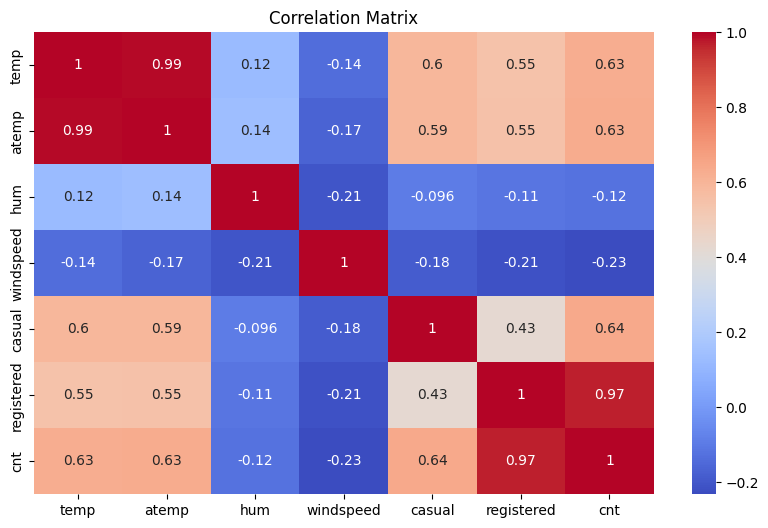

In [28]:
correlation_matrix = df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Distribusi Total Sewa Sepeda

**Interpretasi**

Dari grafik tersebut, kita dapat menarik beberapa kesimpulan:

1. **Distribusi Cenderung Normal:** Bentuk grafik secara keseluruhan menyerupai kurva normal (bell curve), yang artinya sebagian besar sewa sepeda berkisar pada nilai rata-rata.
2. **Puncak Distribusi:** Terdapat puncak yang mencolok sekitar 4000-5000 sewa sepeda. Ini menunjukkan bahwa jumlah sewa sepeda yang paling sering terjadi adalah sekitar angka tersebut.
3. **Rentang Distribusi:** Jumlah sewa sepeda bervariasi dari sekitar 0 hingga 8000. Ini menunjukkan bahwa ada hari-hari atau periode waktu di mana permintaan sewa sepeda sangat rendah, dan ada juga hari-hari di mana permintaan sangat tinggi.
4. **Ekor Distribusi:** Baik di sisi kiri maupun kanan puncak, terdapat "ekor" distribusi yang lebih landai. Ini menunjukkan bahwa ada beberapa kejadian di mana jumlah sewa sepeda sangat sedikit atau sangat banyak, meskipun frekuensinya lebih rendah dibandingkan dengan nilai rata-rata.

**Implikasi dan Pertanyaan Lebih Lanjut**

* **Faktor yang Mempengaruhi:** Apa saja faktor yang menyebabkan fluktuasi jumlah sewa sepeda? Misalnya, cuaca, hari dalam seminggu, musim, acara khusus, atau kebijakan pemerintah terkait transportasi.
* **Segmentasi Pasar:** Dapatkah kita mengelompokkan pengguna sepeda berdasarkan jumlah sewa? Misalnya, pengguna reguler (sewa sering), pengguna akhir pekan (sewa pada akhir pekan), atau pengguna musiman (sewa pada musim tertentu).
* **Prediksi:** Dapatkah kita menggunakan data ini untuk memprediksi jumlah sewa sepeda di masa mendatang? Analisis deret waktu atau model prediksi lainnya dapat membantu menjawab pertanyaan ini.
* **Optimasi Bisnis:** Bagaimana informasi ini dapat digunakan untuk mengoptimalkan bisnis penyewaan sepeda? Misalnya, mengatur jumlah sepeda yang tersedia, menyesuaikan harga sewa, atau menawarkan promosi khusus.

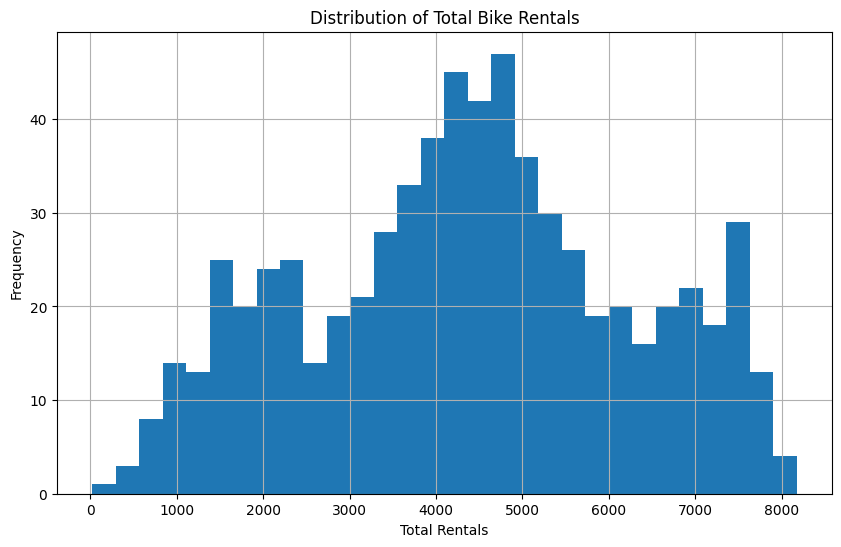

In [29]:
plt.figure(figsize=(10, 6))
df['cnt'].hist(bins=30)
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Bike Rentals')
plt.show()

## Distribusi Penyewaan Sepeda Berdasarkan Hari Kerja

**Interpretasi Grafik**

* **Perbedaan yang Jelas:** Grafik menunjukkan adanya perbedaan yang cukup signifikan antara frekuensi penyewaan sepeda pada hari kerja dan hari libur.
* **Puncak Penyewaan pada Hari Kerja:** Terdapat beberapa puncak frekuensi penyewaan yang lebih tinggi pada hari kerja, terutama di sekitar rentang 4000-5000 total penyewaan. Ini mengindikasikan bahwa pada hari kerja, permintaan akan penyewaan sepeda cenderung lebih tinggi dan lebih stabil dibandingkan dengan hari libur.
* **Variasi Penyewaan pada Hari Libur:** Pada hari libur, distribusi penyewaan sepeda lebih bervariasi. Ada beberapa hari libur dengan jumlah penyewaan yang sangat tinggi, tetapi juga ada beberapa hari libur dengan jumlah penyewaan yang relatif rendah. Ini menunjukkan bahwa faktor lain selain hari kerja/libur juga mempengaruhi permintaan penyewaan sepeda pada hari libur, seperti cuaca, acara khusus, atau musim.

**Kesimpulan**

Berdasarkan grafik, dapat disimpulkan bahwa:

* **Hari kerja:** Secara umum, permintaan penyewaan sepeda pada hari kerja lebih tinggi dan lebih stabil dibandingkan dengan hari libur. Ini mungkin karena banyak orang menggunakan sepeda sebagai alat transportasi untuk bekerja atau aktivitas sehari-hari lainnya.
* **Hari libur:** Permintaan penyewaan sepeda pada hari libur lebih fluktuatif dan dipengaruhi oleh berbagai faktor selain status hari kerja/libur.

**Faktor-faktor yang Mungkin Mempengaruhi Perbedaan Ini:**

* **Tujuan Penggunaan:**
    * **Hari kerja:** Penyewaan sepeda pada hari kerja seringkali untuk tujuan komutasi (pergi ke kantor, sekolah, dll.).
    * **Hari libur:** Penyewaan sepeda pada hari libur lebih sering untuk tujuan rekreasi, olahraga, atau wisata.
* **Cuaca:** Cuaca yang baik pada hari libur cenderung meningkatkan permintaan penyewaan sepeda untuk aktivitas rekreasi.
* **Acara Khusus:** Adanya acara khusus seperti festival atau event olahraga dapat meningkatkan permintaan penyewaan sepeda pada hari libur tertentu.
* **Musim:** Musim juga dapat mempengaruhi permintaan penyewaan sepeda, terutama di daerah dengan perbedaan musim yang signifikan.

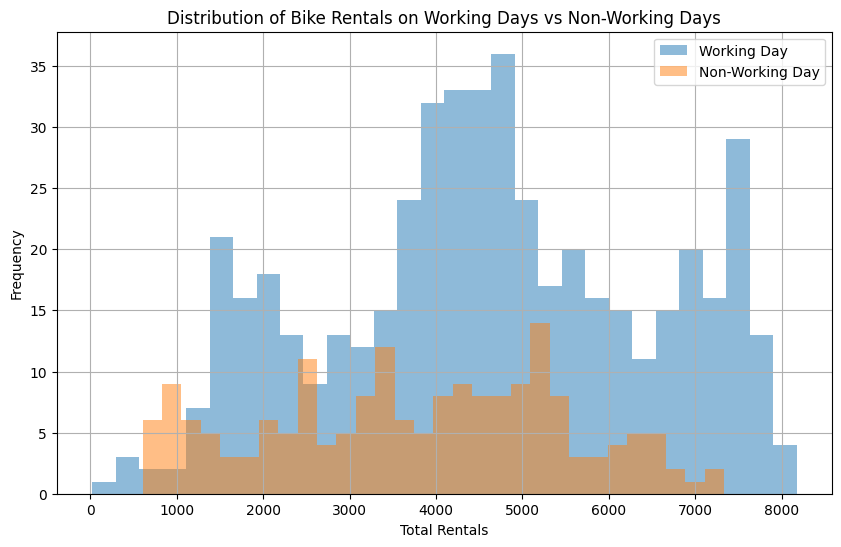

In [38]:
plt.figure(figsize=(10, 6))
df[df['workingday'] == 1]['cnt'].hist(bins=30, alpha=0.5, label='Working Day')
df[df['workingday'] == 0]['cnt'].hist(bins=30, alpha=0.5, label='Non-Working Day')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rentals on Working Days vs Non-Working Days')
plt.legend()
plt.show()

## Distribusi Penyewaan Sepeda Berdasarkan Musim

### Interpretasi Umum

* **Variasi Musim:** Grafik menunjukkan adanya variasi yang signifikan dalam jumlah penyewaan sepeda di setiap musim.
* **Puncak Penyewaan:** Setiap musim memiliki puncak penyewaan yang berbeda-beda. Ini mengindikasikan bahwa faktor musiman sangat mempengaruhi permintaan terhadap penyewaan sepeda.
* **Distribusi:** Distribusi penyewaan sepeda pada setiap musim cenderung mengikuti pola yang serupa, namun dengan puncak yang berbeda. Ini menunjukkan adanya faktor umum yang mempengaruhi permintaan di semua musim, tetapi juga faktor spesifik untuk setiap musim.

### Analisis Per Musim

* **Musim Semi:** Penyewaan sepeda pada musim semi cenderung meningkat secara bertahap hingga mencapai puncaknya. Ini mungkin disebabkan oleh cuaca yang mulai membaik setelah musim dingin dan meningkatnya aktivitas di luar ruangan.
* **Musim Panas:** Musim panas biasanya menjadi puncak musim penyewaan sepeda. Cuaca yang hangat dan cerah sangat mendukung aktivitas bersepeda, baik untuk rekreasi maupun transportasi.
* **Musim Gugur:** Setelah puncak pada musim panas, jumlah penyewaan sepeda mulai menurun pada musim gugur. Namun, masih ada jumlah yang cukup signifikan, terutama di awal musim gugur ketika cuaca masih hangat.
* **Musim Dingin:** Penyewaan sepeda mencapai titik terendah pada musim dingin. Cuaca yang dingin, hujan, atau bahkan salju membuat bersepeda menjadi kurang nyaman dan aman.

### Faktor-faktor yang Mempengaruhi

* **Cuaca:** Cuaca adalah faktor utama yang mempengaruhi penyewaan sepeda. Cuaca yang cerah dan hangat mendorong lebih banyak orang untuk bersepeda.
* **Suhu:** Suhu yang terlalu dingin atau terlalu panas dapat mengurangi minat orang untuk bersepeda.
* **Curah Hujan:** Hujan dapat mengurangi jumlah penyewaan sepeda secara signifikan.
* **Hari Libur dan Cuti:** Adanya hari libur atau cuti sekolah dapat meningkatkan permintaan penyewaan sepeda, terutama pada musim panas.
* **Acara Khusus:** Acara-acara khusus seperti festival atau event olahraga dapat meningkatkan permintaan penyewaan sepeda secara temporer.

### Implikasi dan Pertanyaan Lebih Lanjut

* **Prediksi:** Data ini dapat digunakan untuk membuat model prediksi untuk memperkirakan jumlah penyewaan sepeda di masa mendatang berdasarkan musim.
* **Strategi Bisnis:** Perusahaan penyewaan sepeda dapat menggunakan data ini untuk menyesuaikan jumlah sepeda yang tersedia, harga sewa, dan promosi yang ditawarkan di setiap musim.
* **Perencanaan Infrastruktur:** Pemerintah atau pengelola kota dapat menggunakan data ini untuk merencanakan pembangunan infrastruktur sepeda yang memadai untuk memenuhi permintaan pada musim puncak.

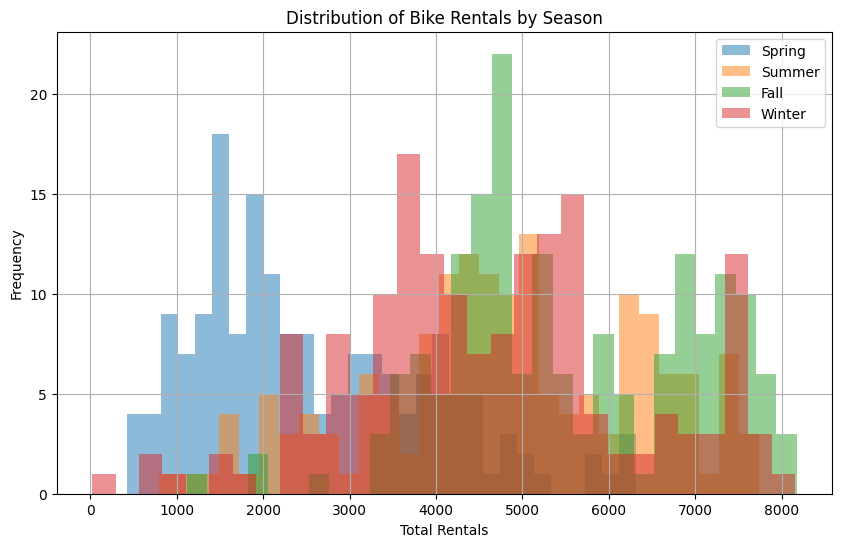

In [39]:
plt.figure(figsize=(10, 6))
df[df['season'] == 1]['cnt'].hist(bins=30, alpha=0.5, label='Spring')
df[df['season'] == 2]['cnt'].hist(bins=30, alpha=0.5, label='Summer')
df[df['season'] == 3]['cnt'].hist(bins=30, alpha=0.5, label='Fall')
df[df['season'] == 4]['cnt'].hist(bins=30, alpha=0.5, label='Winter')
plt.xlabel('Total Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Bike Rentals by Season')
plt.legend()
plt.show()

**Hubungan antara Suhu dan Jumlah Pengguna Sepeda**

Hubungan antara suhu dan jumlah pengguna sepeda sangat erat dan dipengaruhi oleh beberapa faktor berikut:

* **Kenyamanan:**
    * **Suhu yang sejuk:** Pada suhu yang sejuk, bersepeda terasa lebih nyaman. Udara yang segar dan tidak terlalu panas membuat aktivitas bersepeda menjadi lebih menyenangkan.
    * **Suhu yang ekstrem:** Baik suhu yang terlalu panas maupun terlalu dingin dapat mengurangi kenyamanan saat bersepeda. Suhu yang terlalu panas dapat menyebabkan dehidrasi dan kelelahan, sedangkan suhu yang terlalu dingin dapat menyebabkan hipotermia.

* **Cuaca:**
    * **Cuaca cerah:** Cuaca yang cerah dan tidak hujan sangat mendukung aktivitas bersepeda. Sebaliknya, hujan lebat atau salju dapat membuat jalan licin dan berbahaya, sehingga mengurangi jumlah pengguna sepeda.
    * **Kelembapan:** Tingkat kelembapan yang tinggi dapat membuat bersepeda terasa lebih berat dan tidak nyaman.

* **Pakaian:**
    * **Pakaian yang sesuai:** Adanya pakaian khusus bersepeda yang dapat menyesuaikan dengan berbagai kondisi cuaca dapat membuat orang lebih nyaman bersepeda di berbagai suhu.

**Secara umum, hubungan antara suhu dan jumlah pengguna sepeda dapat digambarkan sebagai berikut:**

* **Suhu sedang:** Pada suhu yang sedang, jumlah pengguna sepeda cenderung lebih tinggi karena kondisi cuaca yang mendukung.
* **Suhu ekstrem:** Baik suhu yang terlalu panas maupun terlalu dingin dapat menyebabkan penurunan jumlah pengguna sepeda.

**Faktor Lain yang Mempengaruhi:**

Selain suhu, faktor lain yang juga dapat mempengaruhi jumlah pengguna sepeda antara lain:

* **Infrastruktur:** Ketersediaan jalur sepeda yang aman dan nyaman dapat mendorong lebih banyak orang untuk bersepeda, terlepas dari kondisi cuaca.
* **Kebijakan pemerintah:** Kebijakan yang mendukung penggunaan sepeda, seperti penyediaan fasilitas parkir sepeda atau jalur sepeda khusus, dapat meningkatkan jumlah pengguna sepeda.
* **Gaya hidup:** Perubahan gaya hidup masyarakat yang semakin sadar akan pentingnya kesehatan dan lingkungan juga dapat mendorong peningkatan penggunaan sepeda.

**Kesimpulan**

Suhu merupakan salah satu faktor penting yang mempengaruhi jumlah pengguna sepeda. Namun, faktor lain seperti cuaca, infrastruktur, kebijakan pemerintah, dan gaya hidup juga memiliki peran yang signifikan. Untuk meningkatkan jumlah pengguna sepeda, perlu dilakukan upaya yang komprehensif dengan mempertimbangkan semua faktor yang mempengaruhi.

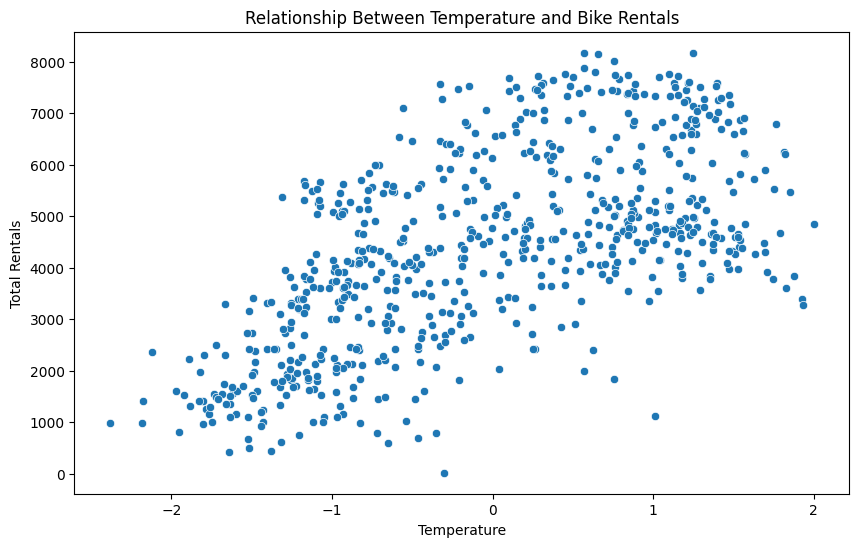

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='cnt', data=df)
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.title('Relationship Between Temperature and Bike Rentals')
plt.show()

## Proporsi Pengguna Sepeda Berdasarkan Kondisi Cuaca

Data yang Anda berikan menunjukkan proporsi pengguna sepeda berdasarkan kondisi cuaca.  Kondisi cuaca yang ideal untuk bersepeda, yaitu cuaca cerah atau sedikit berawan ("Clear") memiliki proporsi pengguna sepeda tertinggi (**62.6%**).  Sementara itu, pada kondisi cuaca berkabut ("Mist") dan cuaca dengan salju/hujan ringan ("Light Snow/Rain") memiliki proporsi pengguna sepeda yang lebih rendah, yaitu sebesar **34.5%** dan **3.0%** berturut-turut.

**Penjelasan rinci:**

* **Cuaca Cerah atau Sedikit Berawan (Clear):** Kondisi cuaca yang cerah atau sedikit berawan menawarkan visibilitas yang baik dan tidak adanya hujan, sehingga pengguna sepeda dapat bersepeda dengan aman dan nyaman.  Hal ini menyebabkan proporsi pengguna sepeda pada kondisi cuaca ini menjadi yang tertinggi.
* **Cuaca Berkabut (Mist):** Kondisi cuaca berkabut dapat menghalangi pandangan pengguna sepeda, sehingga mengurangi kenyamanan dan keamanan bersepeda. Ini dapat menjadi alasan mengapa proporsi pengguna sepeda pada kondisi ini lebih rendah dibandingkan cuaca cerah.
* **Cuaca dengan Salju/Hujan Ringan (Light Snow/Rain):** Kondisi cuaca dengan salju atau hujan ringan dapat membuat jalan menjadi licin dan basah, sehingga berbahaya untuk bersepeda.  Selain itu, salju dan hujan juga dapat membuat pengguna sepeda tidak merasa nyaman.  Hal ini menyebabkan proporsi pengguna sepeda pada kondisi cuaca ini menjadi yang terendah.

**Faktor lain yang mempengaruhi pemilihan sepeda sebagai moda transportasi:**

Selain kondisi cuaca, beberapa faktor lain yang dapat mempengaruhi pemilihan sepeda sebagai moda transportasi antara lain:

* **Jarak tempuh:** Sepeda umumnya lebih cocok untuk perjalanan jarak pendek hingga menengah.
* **Keamanan dan keselamatan:** Infrastruktur bersepeda yang memadai dan kesadaran pengguna jalan lainnya turut mempengaruhi keputusan untuk bersepeda.
* **Kebiasaan dan preferensi pribadi:** Beberapa orang mungkin lebih memilih bersepeda sebagai gaya hidup sehat dan ramah lingkungan.

**Kesimpulan**

Kondisi cuaca merupakan salah satu faktor penting yang dapat mempengaruhi keputusan orang untuk bersepeda. Cuaca yang cerah dan nyaman cenderung mendorong lebih banyak orang untuk bersepeda.  Namun, perlu dicatat bahwa keputusan untuk bersepeda juga dapat dipengaruhi oleh faktor-faktor lain seperti jarak tempuh, keamanan, dan preferensi pribadi.


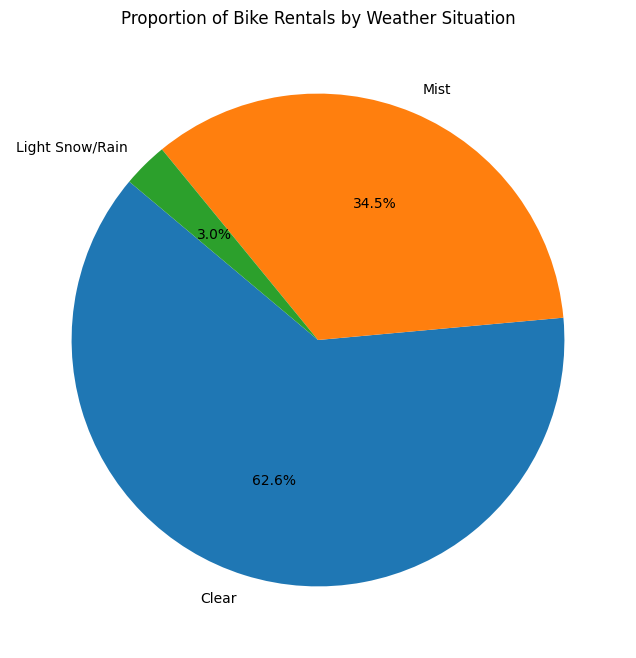

In [35]:
# Menghitung jumlah pengguna sepeda berdasarkan situasi cuaca
weather_counts = df['weathersit'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(weather_counts, labels=['Clear', 'Mist', 'Light Snow/Rain'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Bike Rentals by Weather Situation')
plt.show()

## Proporsi Pengguna Sepeda Berdasarkan Hari Kerja

Mengapa pada akhir pekan atau hari libur cenderung lebih banyak orang menggunakan sepeda dibandingkan hari kerja?

Ada beberapa faktor yang dapat menjelaskan fenomena ini:

Fleksibilitas Waktu:

 - Non-Working Day: Pada akhir pekan atau hari libur, orang cenderung memiliki lebih banyak waktu luang dan fleksibilitas untuk merencanakan aktivitas, termasuk bersepeda. Mereka dapat memilih waktu yang paling nyaman dan sesuai dengan cuaca untuk bersepeda tanpa terikat oleh jadwal kerja.
 
- Working Day: Selama hari kerja, waktu yang tersedia untuk bersepeda seringkali terbatas karena terikat oleh jam kerja, komitmen lain seperti rapat atau tugas, serta waktu tempuh menuju dan dari tempat kerja.

Tujuan Penggunaan:

- Non-Working Day: Pada akhir pekan atau hari libur, orang seringkali menggunakan sepeda untuk tujuan rekreasi, olahraga, atau bersepeda bersama keluarga atau teman. Aktivitas-aktivitas ini cenderung lebih santai dan tidak terburu-buru.

- Working Day: Selama hari kerja, penggunaan sepeda lebih sering untuk tujuan komutasi, yaitu sebagai alat transportasi untuk pergi ke tempat kerja atau menjalankan aktivitas sehari-hari. Ini berarti rute yang ditempuh cenderung lebih jauh dan membutuhkan waktu yang lebih lama.

Faktor Cuaca:

- Non-Working Day: Orang cenderung lebih memperhatikan ramalan cuaca pada akhir pekan atau hari libur dan memilih untuk bersepeda ketika cuaca cerah dan mendukung aktivitas di luar ruangan.

- Working Day: Selama hari kerja, orang mungkin tidak memiliki pilihan lain selain bersepeda meskipun cuaca kurang mendukung, terutama jika mereka tidak memiliki alternatif transportasi lain.

Kondisi Jalan dan Infrastruktur:

- Non-Working Day: Pada akhir pekan atau hari libur, lalu lintas cenderung lebih lengang sehingga bersepeda menjadi lebih aman dan nyaman.

- Working Day: Selama hari kerja, lalu lintas padat dan kondisi jalan yang kurang baik dapat membuat bersepeda menjadi lebih sulit dan berbahaya.

Persepsi dan Motivasi:

- Non-Working Day: Bersepeda pada akhir pekan atau hari libur seringkali dianggap sebagai aktivitas yang menyenangkan dan menyehatkan. Orang mungkin merasa lebih termotivasi untuk bersepeda sebagai bagian dari gaya hidup yang aktif.

- Working Day: Bersepeda selama hari kerja mungkin dianggap sebagai tugas tambahan yang membutuhkan lebih banyak usaha dan persiapan.

#### Kesimpulan

Berdasarkan faktor-faktor di atas, dapat disimpulkan bahwa proporsi pengguna sepeda cenderung lebih tinggi pada akhir pekan atau hari libur dibandingkan hari kerja. Hal ini menunjukkan bahwa untuk meningkatkan penggunaan sepeda secara keseluruhan, perlu ada upaya untuk membuat bersepeda menjadi lebih menarik dan praktis bagi masyarakat, terutama selama hari kerja.

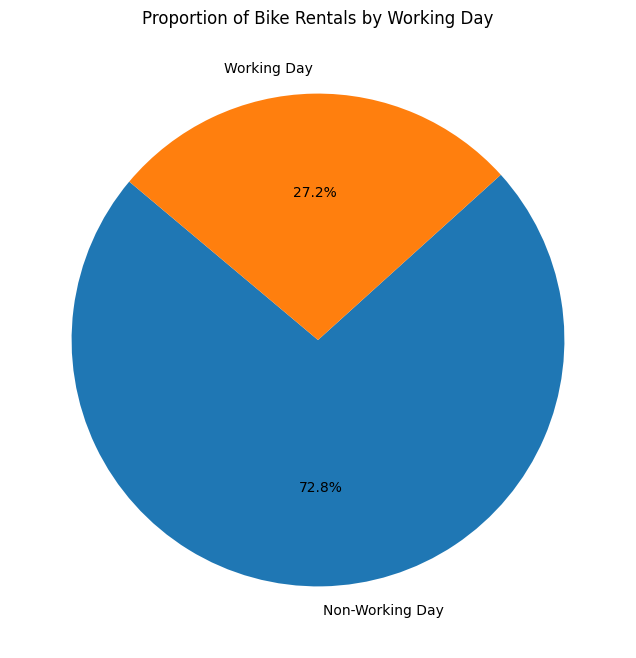

In [40]:
# Menghitung jumlah pengguna sepeda berdasarkan hari kerja
workingday_counts = df['workingday'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(workingday_counts, labels=['Non-Working Day', 'Working Day'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Bike Rentals by Working Day')
plt.show()

## Analisis Proporsi Pengguna Sepeda Berdasarkan Musim

 - Interpretasi Data:

Dari data yang Anda berikan, terlihat bahwa proporsi pengguna sepeda di keempat musim cenderung seimbang. Tidak ada perbedaan yang signifikan antara musim semi, panas, gugur, dan dingin. Artinya, jumlah orang yang memilih bersepeda sebagai moda transportasi atau aktivitas rekreasi relatif konsisten sepanjang tahun.

- Kemungkinan Faktor yang Mempengaruhi:

Meskipun proporsi pengguna sepeda cukup stabil di keempat musim, beberapa faktor berikut ini mungkin dapat mempengaruhi sedikit perubahan pada angka tersebut:

* Kondisi Cuaca:

1. Musim Semi dan Gugur: Cuaca yang cenderung lebih sejuk dan cerah pada musim semi dan gugur biasanya mendorong lebih banyak orang untuk bersepeda. Namun, hujan yang tak terduga di kedua musim ini bisa mengurangi jumlah pengguna sepeda.
2. Musim Panas: Cuaca yang panas dan terik bisa membuat bersepeda menjadi kurang nyaman, terutama di siang hari. Namun, banyak orang yang tetap bersepeda di pagi hari atau sore hari ketika suhu lebih rendah.
3. Musim Dingin: Suhu yang dingin, hujan, salju, dan hari yang lebih pendek dapat mengurangi minat orang untuk bersepeda. Namun, dengan adanya peralatan seperti jaket, sarung tangan, dan lampu, beberapa orang tetap bersepeda di musim dingin.

* Ketersediaan Fasilitas:

1. Jalur Sepeda: Ketersediaan jalur sepeda yang aman dan nyaman sepanjang tahun akan mendorong lebih banyak orang untuk bersepeda, terlepas dari musimnya.
2. Fasilitas Pendukung: Adanya fasilitas seperti tempat parkir sepeda, pompa ban, dan bengkel sepeda juga dapat mempengaruhi keputusan seseorang untuk bersepeda.

* Kebijakan Pemerintah:

1. Insentif: Program-program insentif seperti subsidi pembelian sepeda atau pajak yang lebih rendah untuk pengguna sepeda dapat mendorong peningkatan penggunaan sepeda.
2. Kampanye: Kampanye promosi bersepeda yang dilakukan sepanjang tahun juga dapat meningkatkan kesadaran masyarakat tentang manfaat bersepeda dan mendorong lebih banyak orang untuk mencoba bersepeda.

- Gaya Hidup dan Preferensi Pribadi:

1. Kebiasaan: Beberapa orang mungkin memiliki kebiasaan bersepeda setiap hari, terlepas dari cuaca atau musim.
2. Preferensi: Preferensi individu terhadap jenis aktivitas olahraga juga dapat mempengaruhi keputusan untuk bersepeda.

Kesimpulan:

Data yang menunjukkan bahwa minat masyarakat terhadap bersepeda cukup stabil sepanjang tahun. Meskipun kondisi cuaca dan faktor lainnya dapat sedikit mempengaruhi jumlah pengguna sepeda pada musim tertentu, secara keseluruhan, bersepeda telah menjadi bagian dari gaya hidup banyak orang.

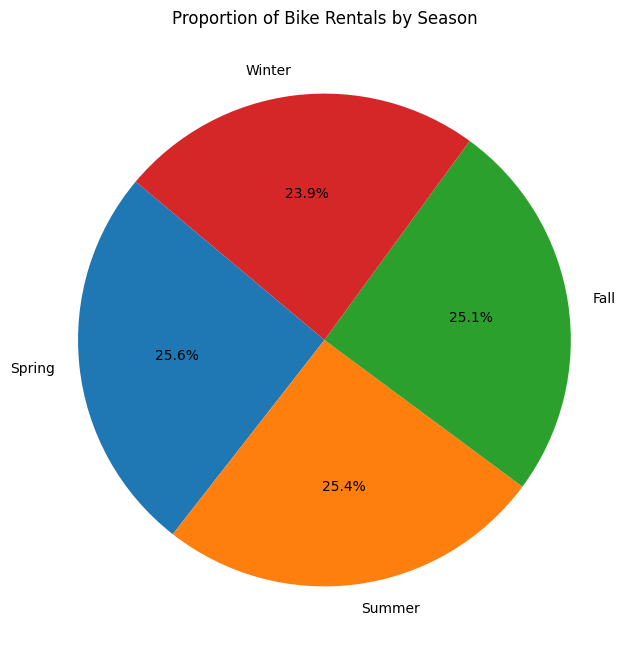

In [41]:
# Menghitung jumlah pengguna sepeda berdasarkan musim
season_counts = df['season'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 8))
plt.pie(season_counts, labels=['Spring', 'Summer', 'Fall', 'Winter'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Bike Rentals by Season')
plt.show()
